In [28]:
import sys
sys.path.append("../utils")
from utils import load_data,load_encoded_data, set_random_seed
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import spearmanr
from mlp import grid_search, plot_results
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.linear_model import LinearRegression

# Load Data

In [29]:
non_encoded_train, test, targets = load_data(raw=False)
ae, vae, cgc, pca = load_encoded_data()
set_random_seed(42)

nb_train_cell_lines = targets.shape[0] # 742

ae_train = ae[:nb_train_cell_lines]
ae_test = ae[nb_train_cell_lines:]

vae_train = vae[:nb_train_cell_lines]
vae_test = vae[nb_train_cell_lines:]

pca_train = pca[:nb_train_cell_lines]
pca_test = pca[nb_train_cell_lines:]

cgc_train = cgc[:nb_train_cell_lines]
cgc_test = cgc[nb_train_cell_lines:]


X_train, X_test, y_train, y_test = train_test_split(non_encoded_train, targets, test_size=0.2, random_state=42)
X_train_ae, X_test_ae, y_train_ae, y_test_ae = train_test_split(ae_train, targets, test_size=0.2, random_state=42)
X_train_vae, X_test_vae, y_train_vae, y_test_vae = train_test_split(vae_train, targets, test_size=0.2, random_state=42)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_train, targets, test_size=0.2, random_state=42)
X_train_cgc, X_test_cgc, y_train_cgc, y_test_cgc = train_test_split(cgc_train, targets, test_size=0.2, random_state=42)


print("Data loaded")

Data loaded


In [30]:
print("Data non encoded shape: ", non_encoded_train.shape)
print("Data ae shape: ", ae_train.shape)
print("Data vae shape: ", vae_train.shape)
print("Data pca shape: ", pca_train.shape)
print("Data cgc shape: ", cgc_train.shape)

Data non encoded shape:  (742, 19907)
Data ae shape:  (742, 50)
Data vae shape:  (742, 50)
Data pca shape:  (742, 742)
Data cgc shape:  (742, 735)


In [31]:
results_dir = "../../results/"

# RankMLP Evaluation

In [32]:
mlp_scores = pd.DataFrame(columns=['MSE', 'Spearman', 'Best params'])

## Non-Encoded Data

Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.5112
Fold 2/3: Val Spearman: 0.4937
Fold 3/3: Val Spearman: 0.4467
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.5073
Fold 2/3: Val Spearman: 0.4055
Fold 3/3: Val Spearman: 0.4606
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.5517
Fold 2/3: Val Spearman: 0.4110
Fold 3/3: Val Spearman: 0.4670
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.5444
Fold 2/3: Val Spearman: 0.4091
Fold 3/3: Val Spearman: 0.4679
Training with parameters: {'epochs': 1000, 'hidden_layers': [50, 25], 'learning_rate': 0.01, 'patience': 10, 'weight_dec

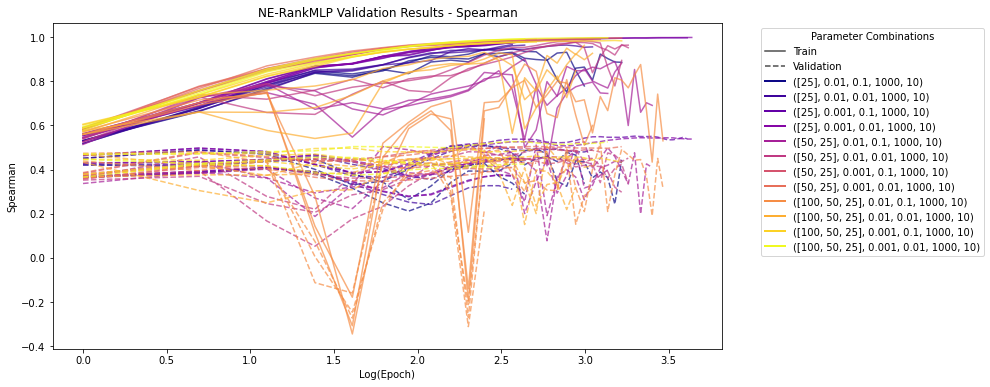

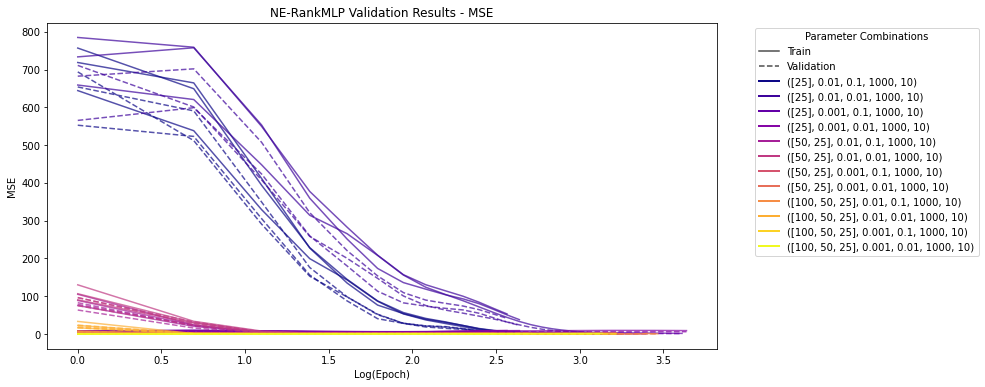

In [33]:
# Define hyperparameter grid
param_grid = {
    "hidden_layers": [[25],[50,25], [100,50,25]],
    "learning_rate": [1e-2, 1e-3],
    "weight_decay": [1e-1, 1e-2],
    "epochs": [1000],
    "patience": [10],
}

# Get scores for different feature sets and print the results
results, best_params, test_spearman, test_mse = grid_search(X_train.values, y_train['AAC'].values, X_test.values, y_test['AAC'].values, param_grid, verbose=1)
mlp_scores.loc['NE'] = [test_mse, test_spearman, best_params]
plot_results(results, param_grid, "NE-RankMLP Validation Results")

In [34]:
results.to_csv(results_dir + "NE-RankMLP.csv")

## Auto-encoder Data

Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.4765
Fold 2/3: Val Spearman: 0.4379
Fold 3/3: Val Spearman: 0.3874
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.3886
Fold 2/3: Val Spearman: 0.3365
Fold 3/3: Val Spearman: 0.3891
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.2604
Fold 2/3: Val Spearman: 0.2634
Fold 3/3: Val Spearman: 0.3340
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.2651
Fold 2/3: Val Spearman: 0.2623
Fold 3/3: Val Spearman: 0.3359
Training with parameters: {'epochs': 1000, 'hidden_layers': [50, 25], 'learning_rate': 0.01, 'patience': 10, 'weight_dec

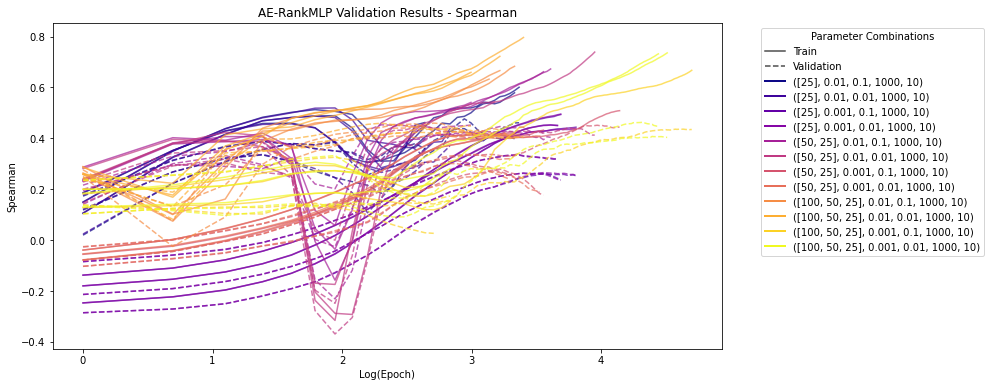

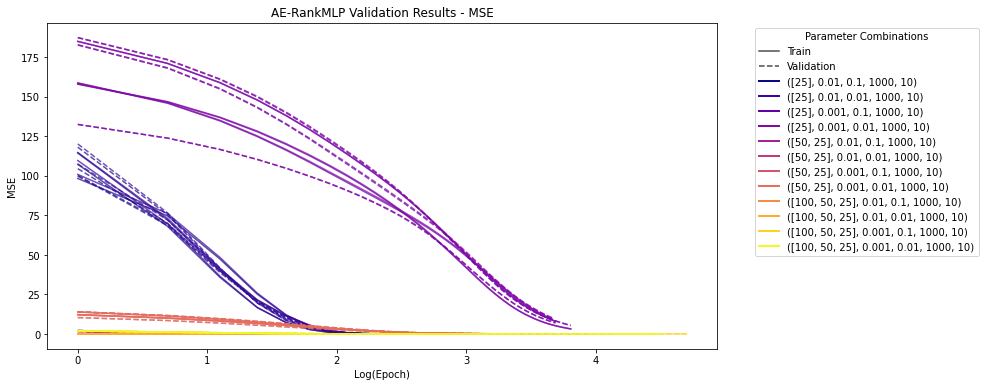

In [35]:
# Define hyperparameter grid
param_grid = {
    "hidden_layers": [[25],[50,25], [100,50,25]],
    "learning_rate": [1e-2, 1e-3],
    "weight_decay": [1e-1, 1e-2],
    "epochs": [1000],
    "patience": [10],
}

# Get scores for different feature sets and print the results
results_ae, best_ae_params, test_ae_spearman, test_ae_mse = grid_search(X_train_ae.values, y_train_ae['AAC'].values, X_test_ae.values, y_test_ae['AAC'].values, param_grid, verbose=1)
mlp_scores.loc['AE'] = [test_ae_mse, test_ae_spearman, best_ae_params]
plot_results(results_ae, param_grid, "AE-RankMLP Validation Results")

In [36]:
results_ae.to_csv(results_dir + "AE-RankMLP.csv")

## Variational Auto-encoder

Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.0905
Fold 2/3: Val Spearman: -0.0059
Fold 3/3: Val Spearman: 0.1452
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.1140
Fold 2/3: Val Spearman: 0.1324
Fold 3/3: Val Spearman: 0.2012
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.0691
Fold 2/3: Val Spearman: -0.0217
Fold 3/3: Val Spearman: -0.0600
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.0720
Fold 2/3: Val Spearman: -0.0177
Fold 3/3: Val Spearman: 0.1384
Training with parameters: {'epochs': 1000, 'hidden_layers': [50, 25], 'learning_rate': 0.01, 'patience': 10, 'weight

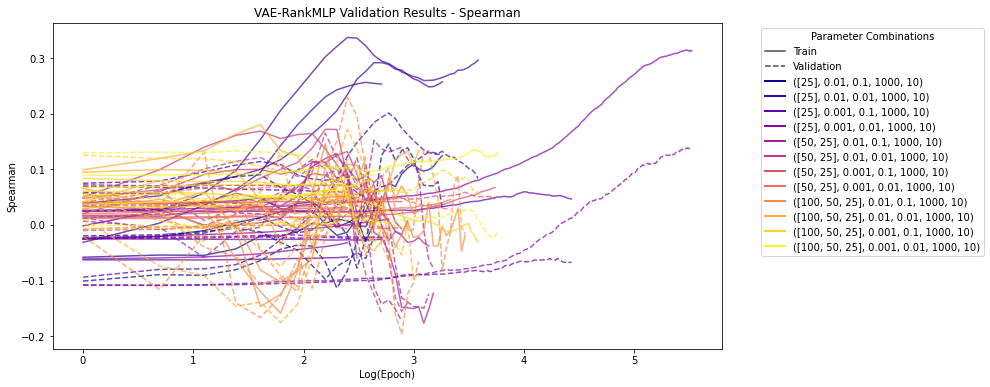

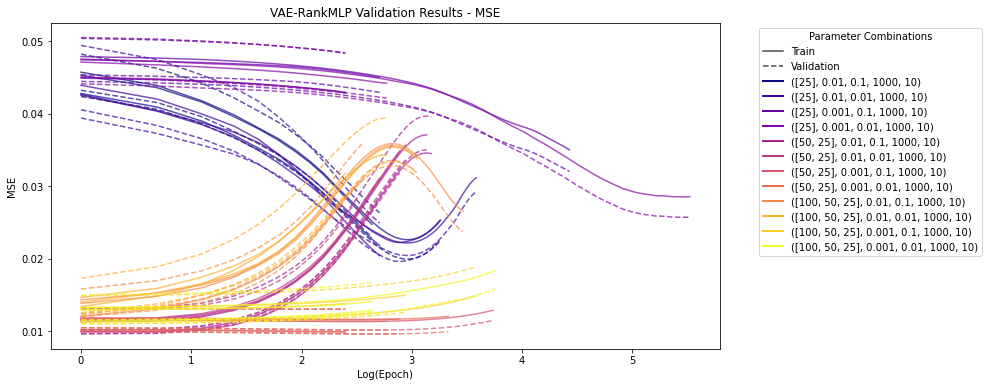

In [37]:
# Get scores for different feature sets and print the results
results_vae, best_vae_params, test_vae_spearmen, test_vae_mse = grid_search(X_train_vae.values, y_train_vae['AAC'].values, X_test_vae.values, y_test_vae['AAC'].values, param_grid, verbose=1)
mlp_scores.loc['VAE'] = [test_vae_mse, test_vae_spearmen, best_vae_params]
plot_results(results_vae, param_grid, "VAE-RankMLP Validation Results")

In [38]:
results_vae.to_csv(results_dir + "VAE-RankMLP.csv")

## PCA Data

Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.5381
Fold 2/3: Val Spearman: 0.4480
Fold 3/3: Val Spearman: 0.4566
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.5399
Fold 2/3: Val Spearman: 0.4483
Fold 3/3: Val Spearman: 0.4631
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.5180
Fold 2/3: Val Spearman: 0.4405
Fold 3/3: Val Spearman: 0.4720
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.4871
Fold 2/3: Val Spearman: 0.4167
Fold 3/3: Val Spearman: 0.4316
Training with parameters: {'epochs': 1000, 'hidden_layers': [50, 25], 'learning_rate': 0.01, 'patience': 10, 'weight_dec

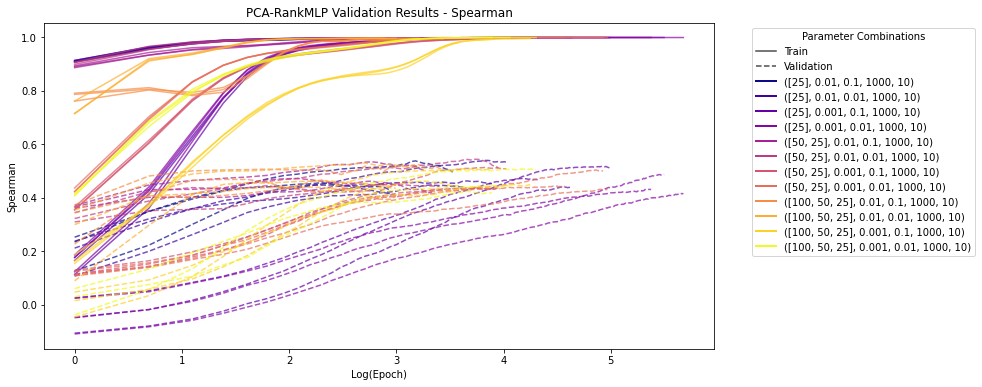

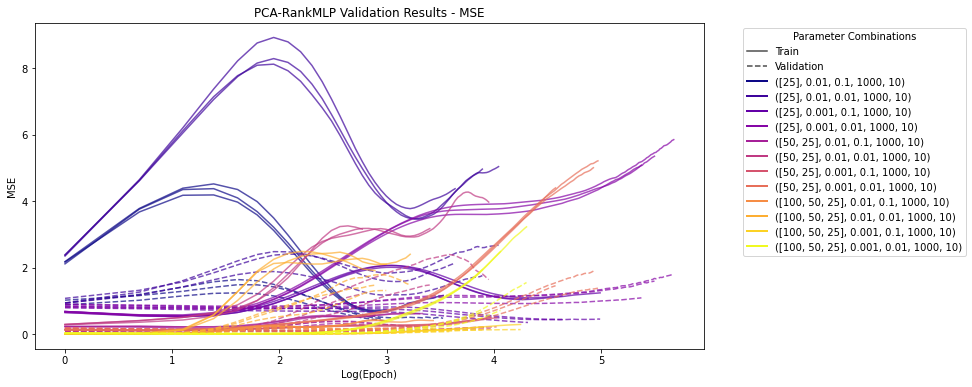

In [39]:
# Get scores for different feature sets and print the results
results_pca, best_pca_params, test_pca_spearman, test_pca_mse = grid_search(X_train_pca.values, y_train_pca['AAC'].values, X_test_pca.values, y_test_pca['AAC'].values, param_grid, verbose=1)
mlp_scores.loc['PCA'] = [test_pca_mse, test_pca_spearman, best_pca_params]
plot_results(results_pca, param_grid, "PCA-RankMLP Validation Results")

In [40]:
results_pca.to_csv(results_dir + "PCA-RankMLP.csv")

## CGC Data

Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.4563
Fold 2/3: Val Spearman: 0.4073
Fold 3/3: Val Spearman: 0.4714
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.01, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.4517
Fold 2/3: Val Spearman: 0.3932
Fold 3/3: Val Spearman: 0.4626
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.1}
Fold 1/3: Val Spearman: 0.4195
Fold 2/3: Val Spearman: 0.4074
Fold 3/3: Val Spearman: 0.4706
Training with parameters: {'epochs': 1000, 'hidden_layers': [25], 'learning_rate': 0.001, 'patience': 10, 'weight_decay': 0.01}
Fold 1/3: Val Spearman: 0.4125
Fold 2/3: Val Spearman: 0.4093
Fold 3/3: Val Spearman: 0.4587
Training with parameters: {'epochs': 1000, 'hidden_layers': [50, 25], 'learning_rate': 0.01, 'patience': 10, 'weight_dec

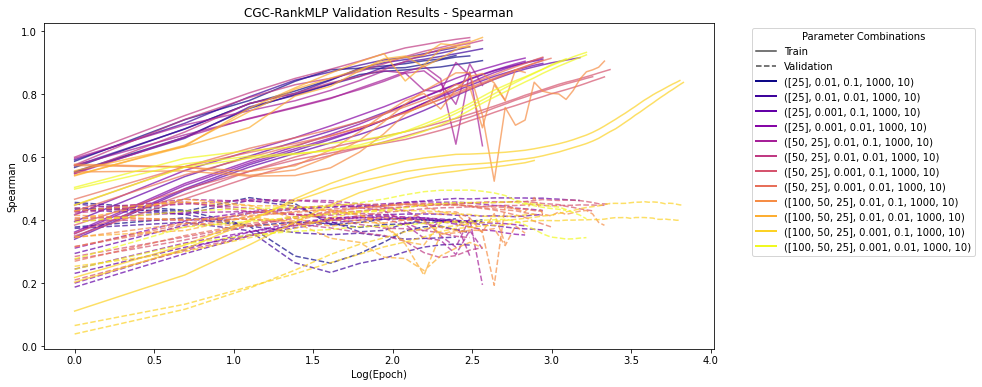

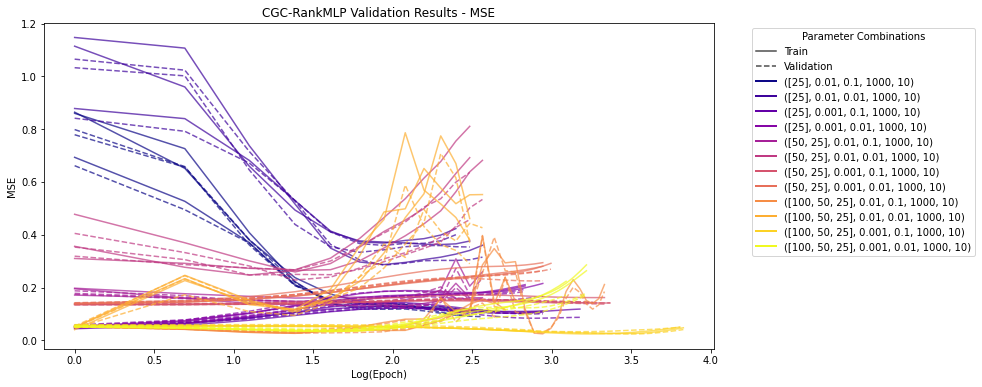

In [41]:
# Get scores for different feature sets and print the results
results_cgc, best_cgc_params, test_cgc_spearman, test_cgc_spearman = grid_search(X_train_cgc.values, y_train_cgc['AAC'].values, X_test_cgc.values, y_test_cgc['AAC'].values, param_grid, verbose=1)
mlp_scores.loc['CGC'] = [test_cgc_spearman, test_cgc_spearman, best_cgc_params]
plot_results(results_cgc, param_grid, "CGC-RankMLP Validation Results")

In [42]:
results_cgc.to_csv(results_dir + "CGC-RankMLP.csv")

In [43]:
print(mlp_scores)
mlp_scores.to_csv(results_dir + "mlp_scores.csv")

          MSE  Spearman                                        Best params
NE   0.604172  0.411773  {'epochs': 1000, 'hidden_layers': [50, 25], 'l...
AE   0.050173  0.474285  {'epochs': 1000, 'hidden_layers': [100, 50, 25...
VAE  0.025663  0.091671  {'epochs': 1000, 'hidden_layers': [100, 50, 25...
PCA  0.223103  0.464943  {'epochs': 1000, 'hidden_layers': [50, 25], 'l...
CGC  0.133405  0.133405  {'epochs': 1000, 'hidden_layers': [50, 25], 'l...


# Linear Regression Evaluation

In [44]:
# Custom scorer for Spearman correlation
def spearmanr_score(y_true, y_pred):
    return spearmanr(y_true, y_pred)[0]

def get_scores(X, y, model):
    # Perform cross-validation and calculate both MSE and Spearman correlation
    scoring = {
        'MSE': 'neg_mean_squared_error',
        'Spearman': make_scorer(spearmanr_score)
    }
    
    # cross_validate returns a dictionary containing the results
    cv_results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    
    mse = -cv_results['test_MSE'].mean()  # Convert negative MSE back to positive
    spearman = cv_results['test_Spearman'].mean()
    
    return mse, spearman

# Create a LinearRegression model
model = LinearRegression()

# Create an empty DataFrame to store the scores
lr_scores = pd.DataFrame(columns=['MSE', 'Spearman'])

# Get the scores for each method
lr_scores.loc['NE'] = get_scores(non_encoded_train, targets, model)
lr_scores.loc['AE'] = get_scores(ae_train, targets, model)
lr_scores.loc['VAE'] = get_scores(vae_train, targets, model)
lr_scores.loc['PCA'] = get_scores(pca_train, targets, model)
lr_scores.loc['CGC'] = get_scores(cgc_train, targets, model)

# Print the results
print(lr_scores)
lr_scores.to_csv(results_dir + "linear_regression_scores.csv")


          MSE  Spearman
NE   0.008070  0.468965
AE   0.008437  0.443246
VAE  0.009845  0.284932
PCA  0.008070  0.468965
CGC  0.074065  0.165697


# Random Forest Regressor Evaluation

In [46]:
# Define the function to calculate MSE and Spearman, and test on the test data
def grid_search_rf(X_train, y_train, X_test, y_test, model, param_grid):
    scoring = {
        'MSE': 'neg_mean_squared_error',
        'Spearman': make_scorer(spearmanr_score)
    }
    
    # Initialize GridSearchCV with the model and the parameter grid
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring=scoring, refit='MSE', return_train_score=False)
    
    # Fit the grid search
    grid_search.fit(X_train, y_train)
    
    # Extract the results for MSE and Spearman correlation
    mse = -grid_search.cv_results_['mean_test_MSE'].mean()  # Convert negative MSE back to positive
    spearman = grid_search.cv_results_['mean_test_Spearman'].mean()
    
    # Get the best model from the grid search
    best_param = grid_search.best_params_
    model.set_params(**best_param)
    model.fit(X_train, y_train)
    

    # Test the model on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate on the test set
    test_mse = mean_squared_error(y_test, y_pred)
    test_spearman = spearmanr(y_test, y_pred)[0]
    
    return test_mse, test_spearman, grid_search.best_params_

# Initialize the model
model = RandomForestRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 100, 500],
    'max_depth': [None, 10]
}

# Create an empty DataFrame to store the scores
rf_scores = pd.DataFrame(columns=['MSE', 'Spearman', 'Best Parameters'])

# Get scores for different feature sets and print the results
rf_scores.loc['AE'] = grid_search_rf(X_train_ae, y_train_ae['AAC'], X_test_ae, y_test_ae['AAC'], model, param_grid)
print("AE done")

rf_scores.loc['VAE'] = grid_search_rf(X_train_vae, y_train_vae['AAC'], X_test_vae, y_test_vae['AAC'], model, param_grid)
print("VAE done")

rf_scores.loc['PCA'] = grid_search_rf(X_train_pca, y_train_pca['AAC'], X_test_pca, y_test_pca['AAC'], model, param_grid)
print("PCA done")

rf_scores.loc['CGC'] =  grid_search_rf(X_train_cgc, y_train_cgc['AAC'], X_test_cgc, y_test_cgc['AAC'], model, param_grid)
print("CGC done")

# Print the final scores
print(rf_scores)


AE done
VAE done
PCA done
CGC done
          MSE  Spearman                           Best Parameters
AE   0.005541  0.427869  {'max_depth': None, 'n_estimators': 100}
VAE  0.008823  0.202663    {'max_depth': 10, 'n_estimators': 100}
PCA  0.006614  0.328981    {'max_depth': 10, 'n_estimators': 500}
CGC  0.006056  0.369084  {'max_depth': None, 'n_estimators': 500}


In [47]:
rf_scores.to_csv(results_dir + "random_forest_scores.csv")

# Combine Results

In [48]:
# Combine into a single DataFrame with MultiIndex columns
combined_results = pd.concat(
    [mlp_scores, lr_scores, rf_scores],
    axis=1,
    keys=["MLP", "LR", "RF"]
)
# Display the final DataFrame
combined_results.to_csv(results_dir + "combined_results.csv")

# Final Plots

In [51]:
import importlib
import mlp

importlib.reload(mlp)
from mlp import plot_results

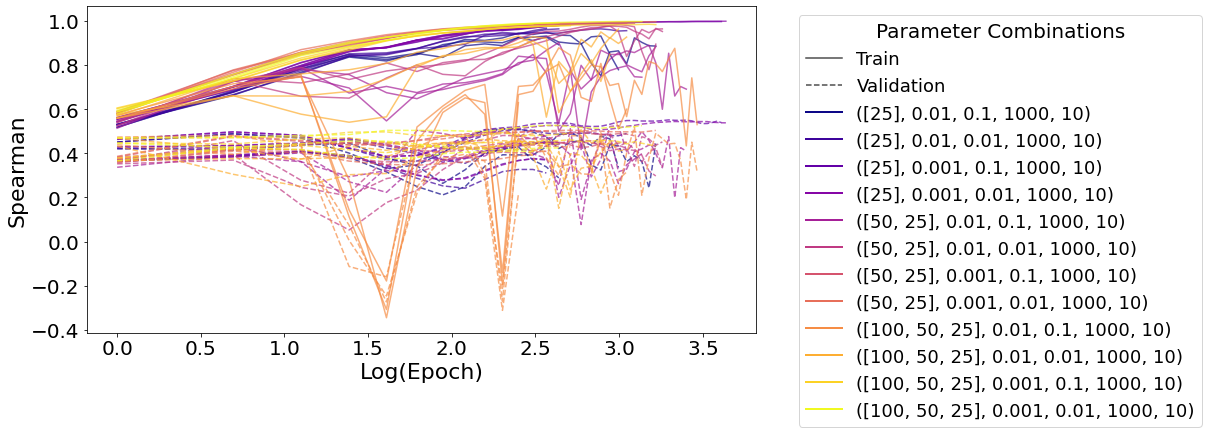

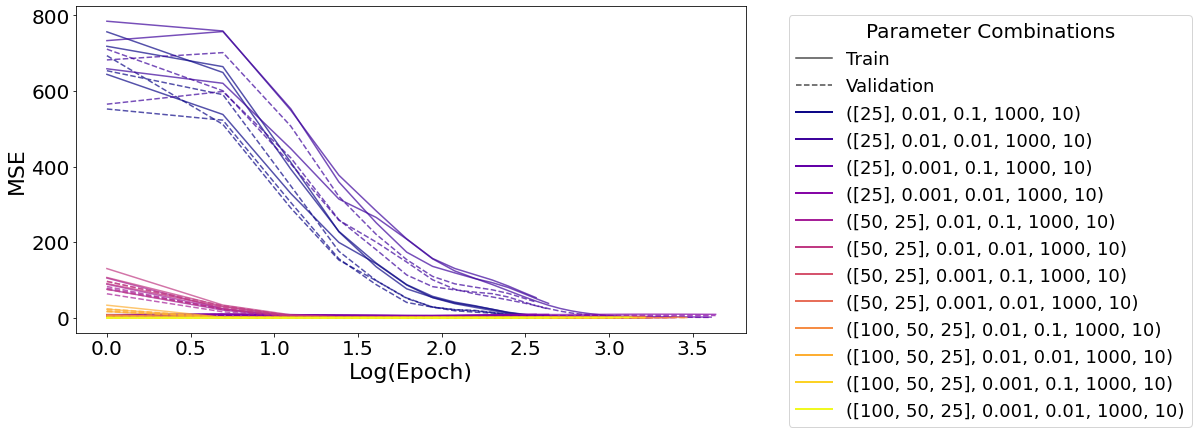

In [53]:
# Define hyperparameter grid
param_grid = {
    "hidden_layers": [[25],[50,25], [100,50,25]],
    "learning_rate": [1e-2, 1e-3],
    "weight_decay": [1e-1, 1e-2],
    "epochs": [1000],
    "patience": [10],
}
plot_results(results, param_grid, "NE-RankMLP Validation Results", True)

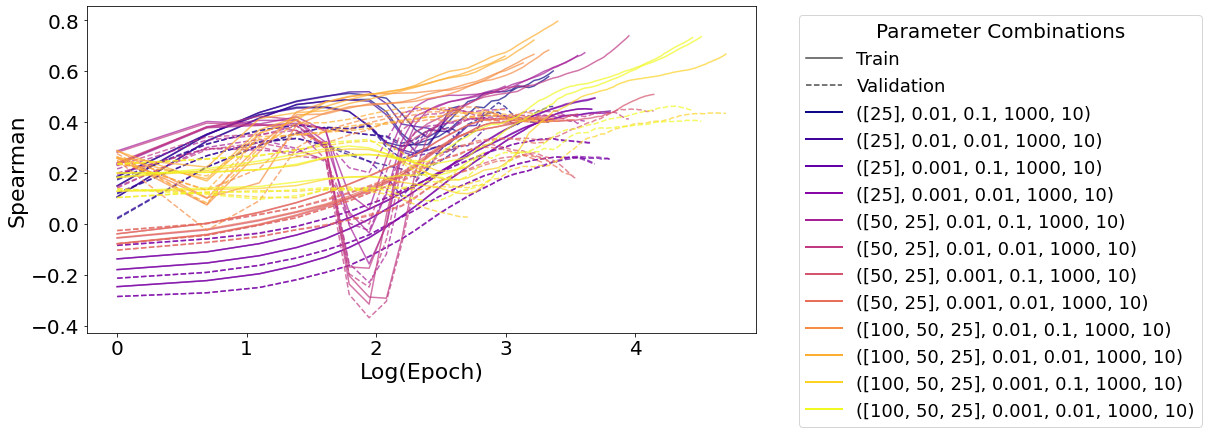

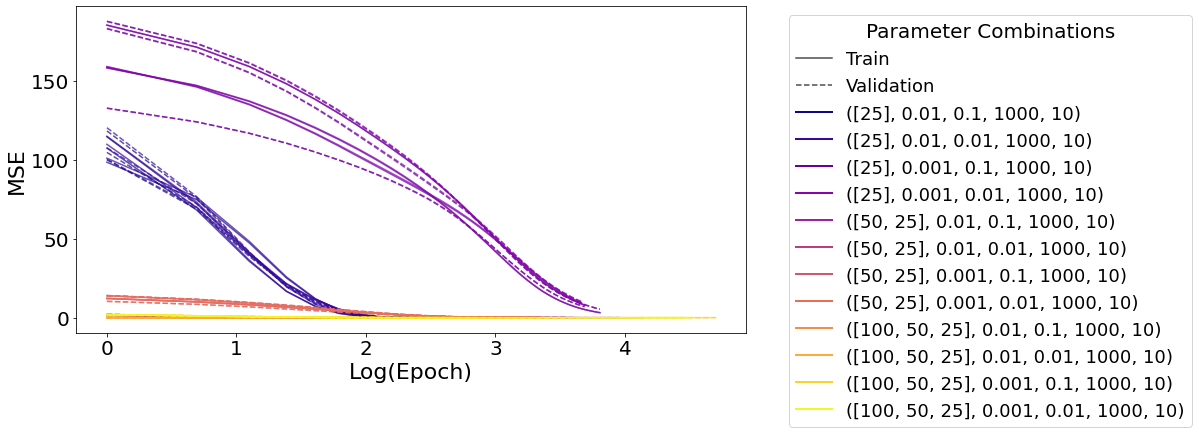

In [54]:
plot_results(results_ae, param_grid, "NE-RankMLP Validation Results", True)

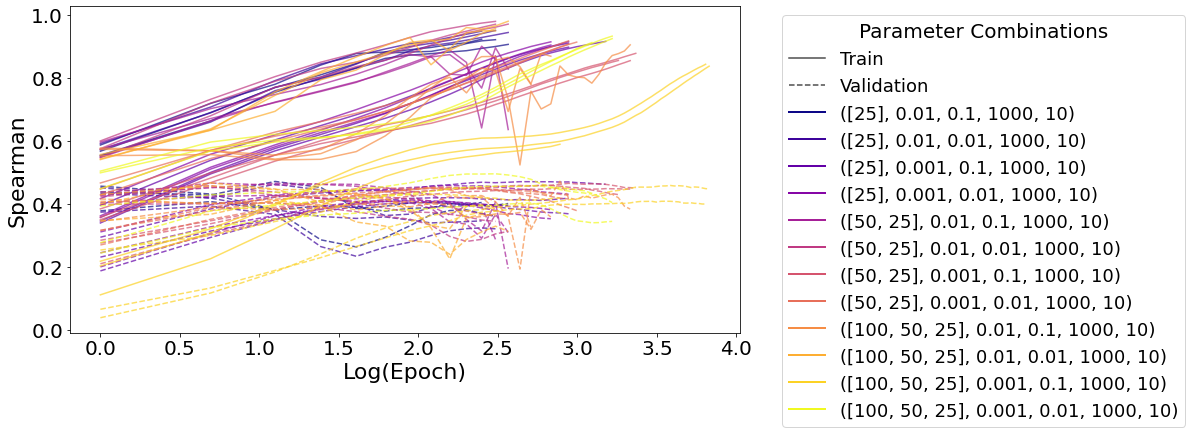

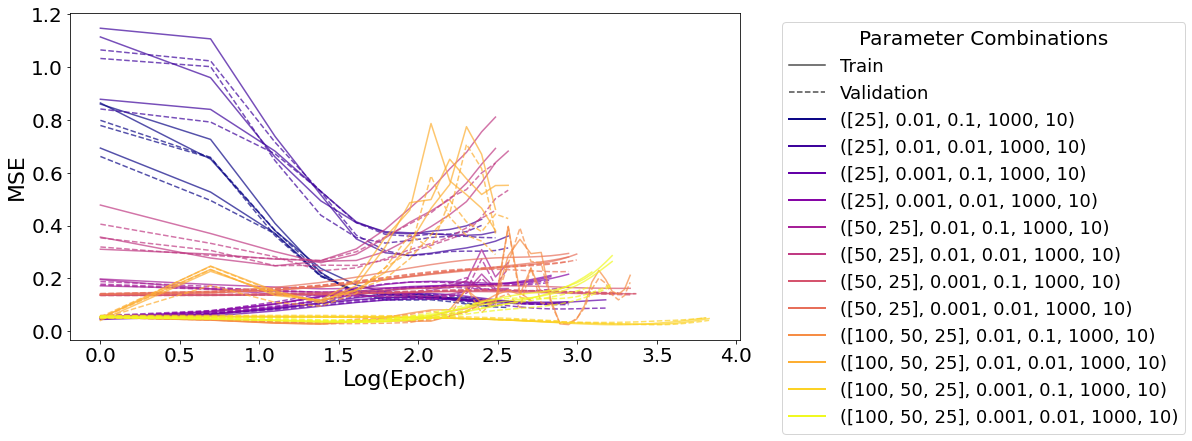

In [55]:
plot_results(results_cgc, param_grid, "NE-RankMLP Validation Results", True)

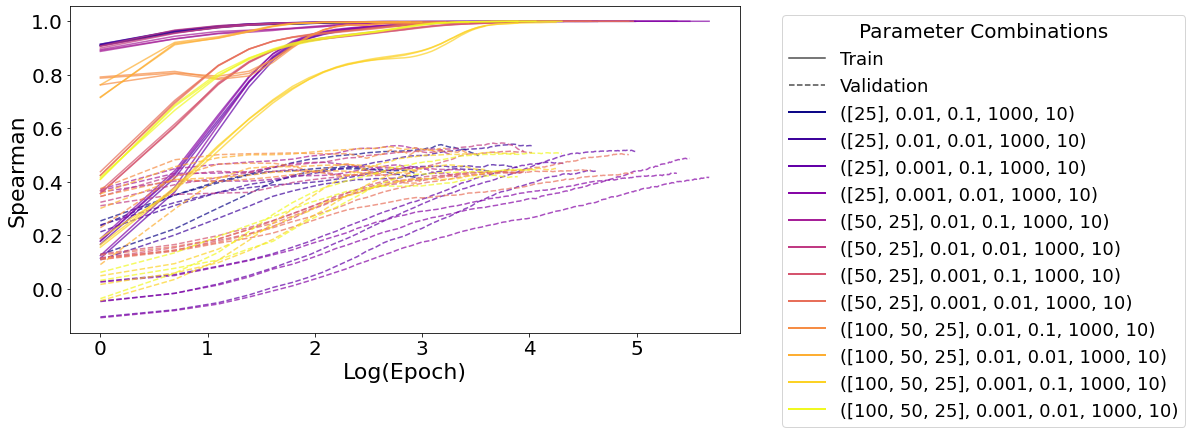

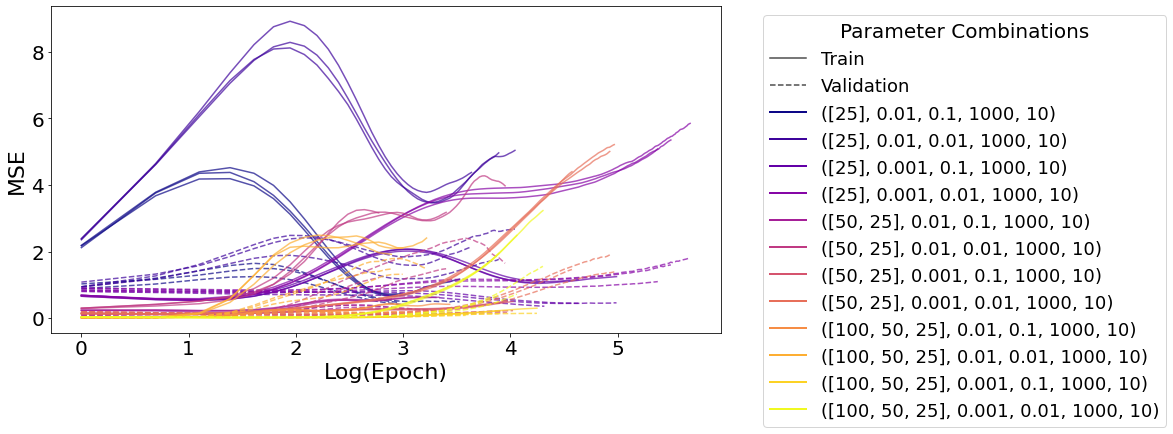

In [56]:
plot_results(results_pca, param_grid, "NE-RankMLP Validation Results", True)

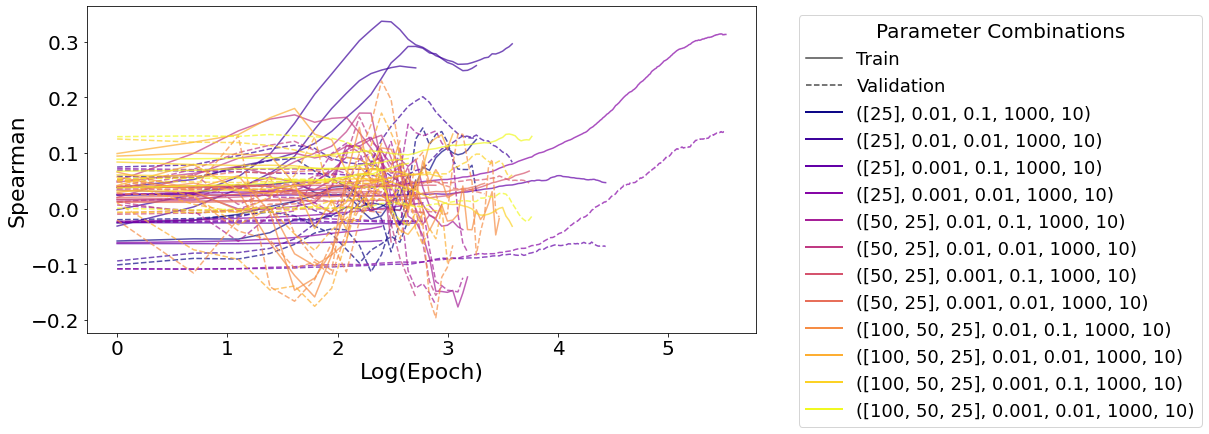

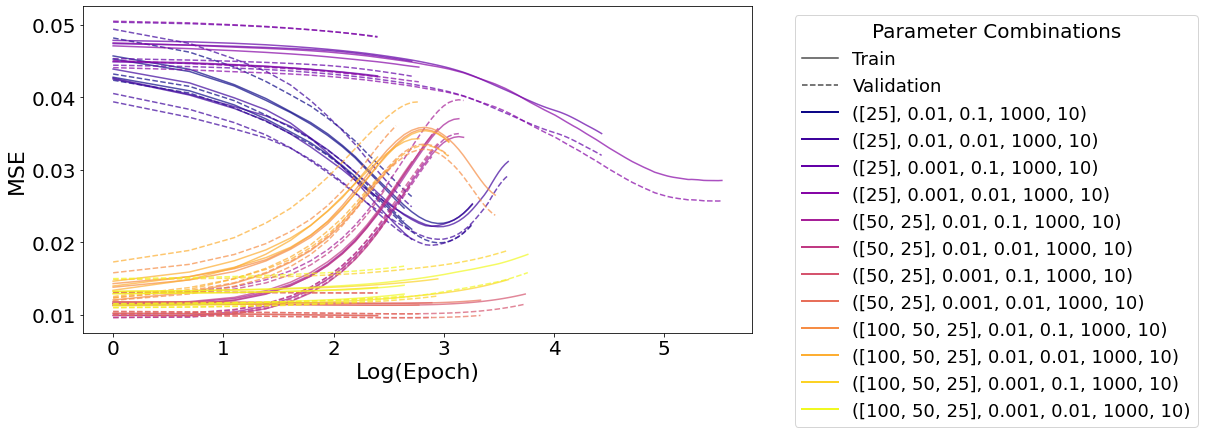

In [57]:
plot_results(results_vae, param_grid, "NE-RankMLP Validation Results", True)